# Doublet detection for EU MS samples

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dat_dir = "/hps/nobackup/stegle/users/huangh/msclerosis/"
output_dir = dat_dir + "/doublet/"
os.chdir(output_dir)

In [2]:
import hilearn

### Comparison with SNP based doublets

In [11]:
def load_multi_dat(_sample, folder='emptyDrops_mat'):
    tsne_dat = pd.read_csv(dat_dir + "/crRun/%s/outs/analysis/tsne/" 
                           %(_sample) + "2_components/projection.csv")

    SNP_dat = pd.read_csv(dat_dir + folder + "/%s/donor_ids.tsv" 
                          %(_sample), sep = "\t")
    
    GEX_dat = pd.read_csv(dat_dir + folder + "/%s/doublet.combined.tsv" 
                          %(_sample), header=0, sep="\t")
    print("cell id matched: %.1f" 
          %np.mean(SNP_dat['cell'] == GEX_dat['cellID']))
    
    print(_sample, len(GEX_dat['dbF_label_fix']))
    
    print(np.unique(2 * GEX_dat['dbF_label_fix'] + 
                    (SNP_dat['donor_id'] == 'doublet'), 
          return_counts=True))
    
    return tsne_dat, SNP_dat, GEX_dat

#idx = hilearn.match(tsne_dat.Barcode, SNP_dat.cell)
#SNP_dat = SNP_dat.loc[idx]

In [4]:
pool_seqID_csf = {"Pool1": 'S16898-H6', "Pool2": 'S16898-A12', 
                  "Pool3": 'S16898-A6', "Pool4": 'S16803-G12', 
                  "Pool5": 'S16961-F5'}

pool_seqID_pbmc = {"Pool1": 'S16898-H3', "Pool2": 'S16898-B6', 
                   "Pool4": 'S16803-F12', "Pool5": 'S16961-G5'}

In [9]:
for samp in pool_seqID_pbmc:
    print(pool_seqID_pbmc[samp])

S16898-H3
S16898-B6
S16803-F12
S16961-G5


In [12]:
for samp in pool_seqID_pbmc:
    print(pool_seqID_pbmc[samp])
    tsne_dat, SNP_dat, GEX_dat = load_multi_dat(pool_seqID_pbmc[samp])

S16898-H3
cell id matched: 1.0
S16898-H3 6479
(array([0, 1, 2, 3]), array([5122,  989,  236,  132]))
S16898-B6
cell id matched: 1.0
S16898-B6 4908
(array([0, 1, 2, 3]), array([4631,   68,  150,   59]))
S16803-F12
cell id matched: 1.0
S16803-F12 1308
(array([0, 1, 2, 3]), array([1285,    8,   13,    2]))
S16961-G5
cell id matched: 1.0
S16961-G5 4897
(array([0, 1, 2, 3]), array([4649,   40,  149,   59]))


In [8]:
SNP_dat.loc[:5]

,cell,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet
0,AAACCTGTCGCACTCT-1,TU620,1.000,3.030000e-10,197,TU620,"TU611,TU620"
1,AAAGCAAGTCCGTTAA-1,TU627,0.999,8.300000e-04,65,TU627,"TU620,TU627"
2,AAATGCCGTGAACCTT-1,TU620,1.000,2.460000e-15,182,TU620,"TU620,TU622"
3,AACCATGAGGGTATCG-1,TU627,1.000,1.380000e-08,223,TU627,"TU611,TU627"
4,AACCGCGCAAGCCCAC-1,TU611,1.000,5.690000e-08,136,TU611,"TU611,TU622"
5,AACCGCGGTCAAAGCG-1,TU622,1.000,1.770000e-09,112,TU622,"TU620,TU627"


In [9]:
GEX_dat.loc[:5]

,cellID,dbF_score_fix,dbF_label_fix,dbF_score_sweep,dbF_label_sweep,scb_score,scb_label,combined_score,combined_label
0,AAACCTGTCGCACTCT-1,0.444,False,0.176,False,0.014,False,0.316,False
1,AAAGCAAGTCCGTTAA-1,0.556,False,0.118,False,0.005,False,0.220,False
2,AAATGCCGTGAACCTT-1,0.889,False,0.118,False,0.043,False,0.756,False
3,AACCATGAGGGTATCG-1,0.556,False,0.118,False,0.006,False,0.232,False
4,AACCGCGCAAGCCCAC-1,0.333,False,0.000,False,0.014,False,0.238,False
5,AACCGCGGTCAAAGCG-1,0.333,False,0.118,False,0.004,False,0.152,False


(array([0, 2]), array([316,   1]))

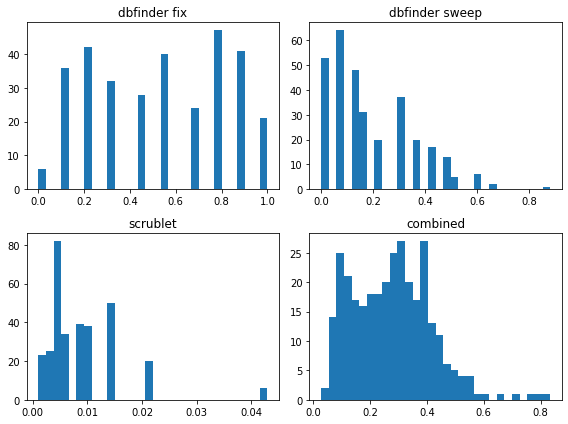

In [10]:
fig = plt.figure(figsize = (8, 6))
plt.subplot(2, 2, 1)
plt.hist(GEX_dat['dbF_score_fix'], bins=30)
plt.title("dbfinder fix")

plt.subplot(2, 2, 2)
plt.hist(GEX_dat['dbF_score_sweep'], bins=30)
plt.title("dbfinder sweep")

plt.subplot(2, 2, 3)
plt.hist(GEX_dat['scb_score'], bins=30)
plt.title("scrublet")

plt.subplot(2, 2, 4)
plt.hist(GEX_dat['combined_score'], bins=30)
plt.title("combined")

plt.tight_layout()
plt.show()

In [ ]:
np.

## Comparison with Multiple data sets

In [144]:
def scatter_with_label(x, y, label1, label2, title="",
                       names=['Singlet', 'SNP only', 'GEX only', 'Both']):
    label1 = np.array(label1)
    label2 = np.array(label2)
    idx0 = (label1 == False) * (label2 == False)
    idx1 = (label1 == True)  * (label2 == False)
    idx2 = (label1 == False) * (label2 == True)
    idx3 = (label1 == True)  * (label2 == True)

    plt.scatter(x[idx0], y[idx0], s=1, label=names[0], color="lightgray")
    plt.scatter(x[idx1], y[idx1], s=1, label="%s: %d" %(names[1], sum(idx1)), color='#4796d7')
    plt.scatter(x[idx2], y[idx2], s=1, label="%s: %d" %(names[2], sum(idx2)), color='#79a702')
    plt.scatter(x[idx3], y[idx3], s=1, label="%s: %d" %(names[3], sum(idx3)), color='#df5858')
    
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("%s: %d cells" %(title, len(x)))
    plt.legend(loc="best", markerscale=5)

In [91]:
def quantile_cut(x):
    _cut = np.quantile(x, 1 - 0.85 * len(x) / 100000)
    return x >= _cut

In [136]:
def average_score(x1, x2, x3, 
                  W=np.array([0.25, 0.25, 0.5])):
    """
    """
    X = np.zeros((len(x1), 3))
    X[:, 0] = x1
    X[:, 1] = x2
    X[:, 2] = x3
    
    if W is None:
        W = np.ones((X.shape[1], 1)) / X.shape[1]
    _X = ((X - np.min(X, axis=0, keepdims=True)) /
          (np.max(X, axis=0, keepdims=True) - 
           np.min(X, axis=0, keepdims=True)))

#     _X = ((X - np.mean(X, axis=0, keepdims=True)) /
#           np.var(X, axis=0, keepdims=True))
    
    return np.dot(_X, W), X

In [139]:
def multi_plot(tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat, 
               _sample, fig_file=None):
    
    fig = plt.figure(figsize=(10, 8), dpi=100)

    ### doubletFinder with pK according to n_cell
    plt.subplot(2, 2, 1)
    scatter_with_label(tsne_dat['TSNE-1'], tsne_dat['TSNE-2'], 
                       vireo_dat['doublet'], 
                       dbfinder_dat['label_sweep'] == 'Doublet',
                       title='dbfinder_sweep, %s' %(_sample))
    
    ### doubletFinder with sweeped pK
    plt.subplot(2, 2, 2)
    scatter_with_label(tsne_dat['TSNE-1'], tsne_dat['TSNE-2'],
                       vireo_dat['doublet'], 
                       dbfinder_dat['label_fix'] == 'Doublet',
                       title='dbfinder_fix, %s' %(_sample))

    ### scrublet
    plt.subplot(2, 2, 3)
    _cut = np.quantile(scrublet_dat['score'], 
                       1 - np.mean(dbfinder_dat['label_fix'] == 'Doublet'))
    scatter_with_label(tsne_dat['TSNE-1'], tsne_dat['TSNE-2'],
                       vireo_dat['doublet'], scrublet_dat['score'] >= _cut,
                       title='scrublet, %s' %(_sample))

    ### Combine three values (averaged)
    plt.subplot(2, 2, 4)
    _avg_score, _X = average_score(dbfinder_dat['pANN_fix'], 
                                   dbfinder_dat['pANN_sweep'],
                                   scrublet_dat['score'])
    _cut = np.quantile(_avg_score, 
                       1 - np.mean(dbfinder_dat['label_fix'] == 'Doublet'))
    scatter_with_label(tsne_dat['TSNE-1'], tsne_dat['TSNE-2'],
                       vireo_dat['doublet'], _avg_score > _cut,
                       title='Combined, %s' %(_sample))

    plt.tight_layout()
    if fig_file is not None:
        plt.savefig(fig_file, dpi=200)
    plt.show()

### Each sample

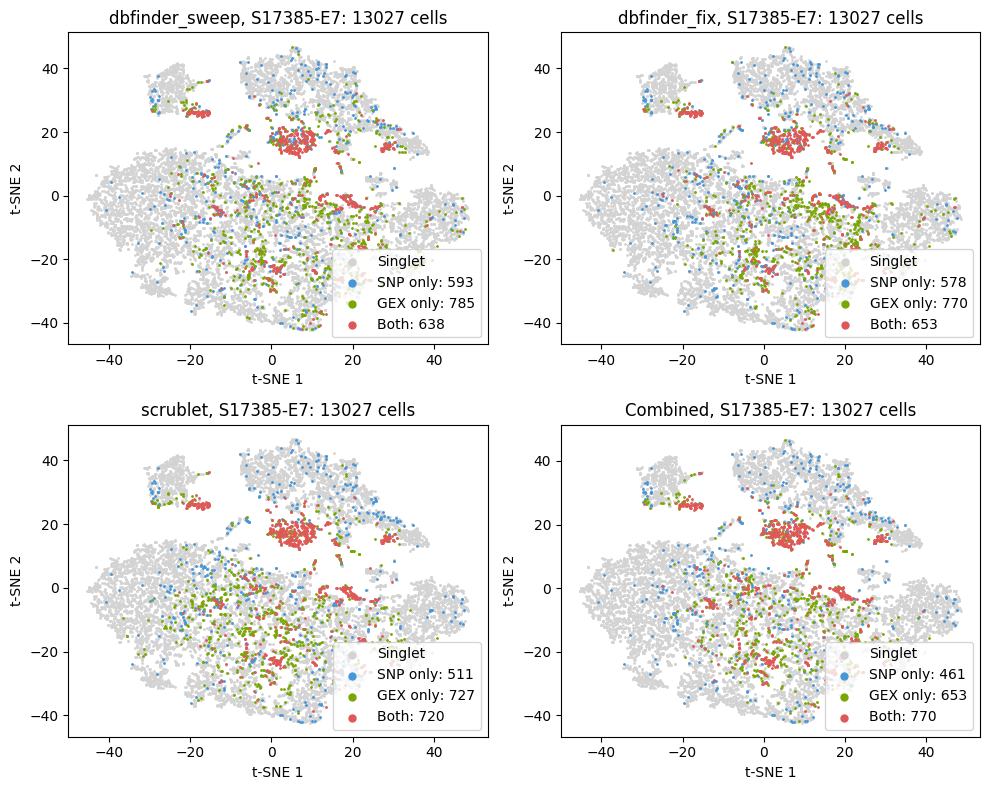

In [145]:
_sample = "S17385-E7"
tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat = load_multi_dat(_sample)
multi_plot(tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat, _sample, 
           fig_file=dat_dir + "doublet/figures/%s.doublet.png" %(_sample))

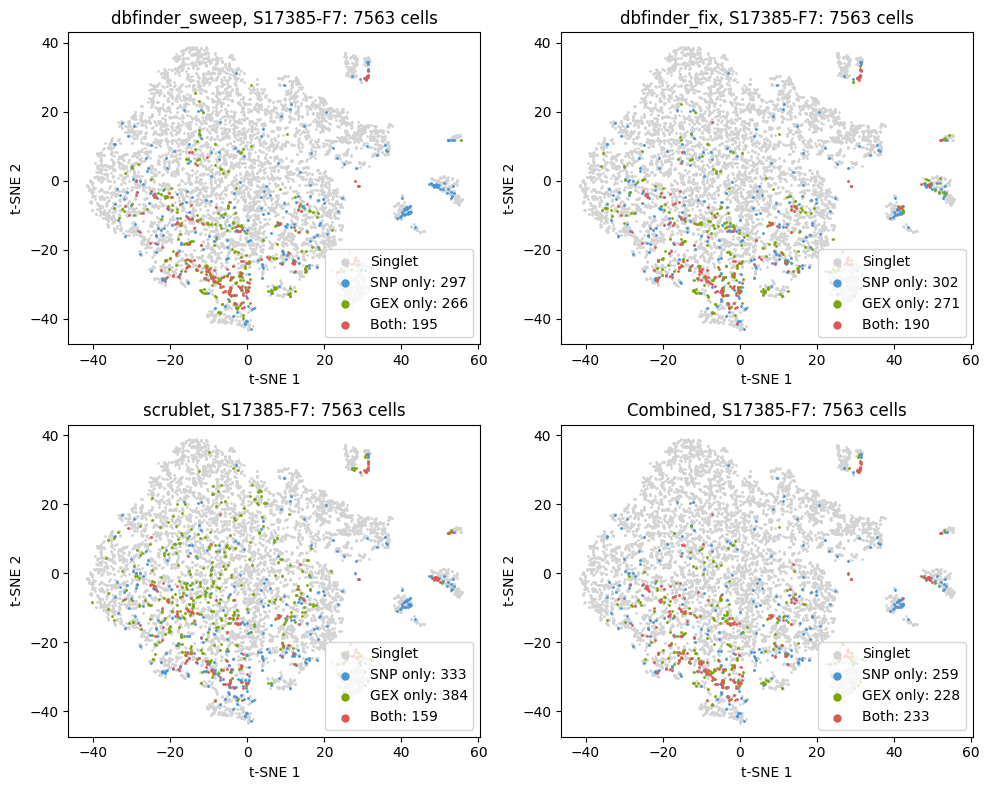

In [146]:
_sample = "S17385-F7"
tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat = load_multi_dat(_sample)
multi_plot(tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat, _sample, 
           fig_file=dat_dir + "doublet/figures/%s.doublet.png" %(_sample))

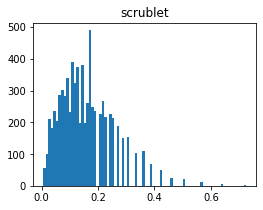

In [47]:
fig = plt.figure(figsize = (4, 3))
plt.hist(scrublet_dat['raw.score'], bins=80)
plt.title("scrublet")
plt.show()

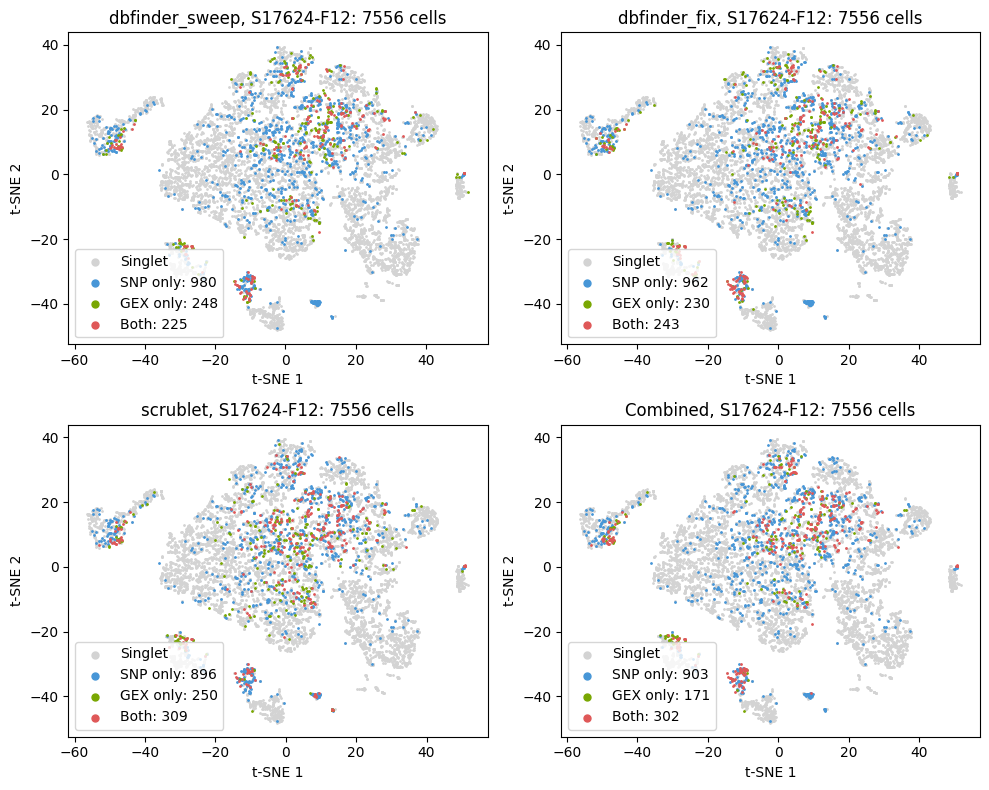

In [147]:
_sample = "S17624-F12"
tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat = load_multi_dat(_sample)
multi_plot(tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat, _sample, 
           fig_file=dat_dir + "doublet/figures/%s.doublet.png" %(_sample))

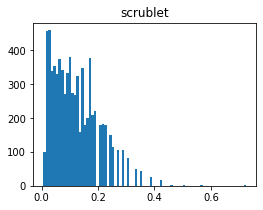

In [63]:
fig = plt.figure(figsize = (4, 3))
plt.hist(scrublet_dat.score, bins=80)
plt.title("scrublet")
plt.show()

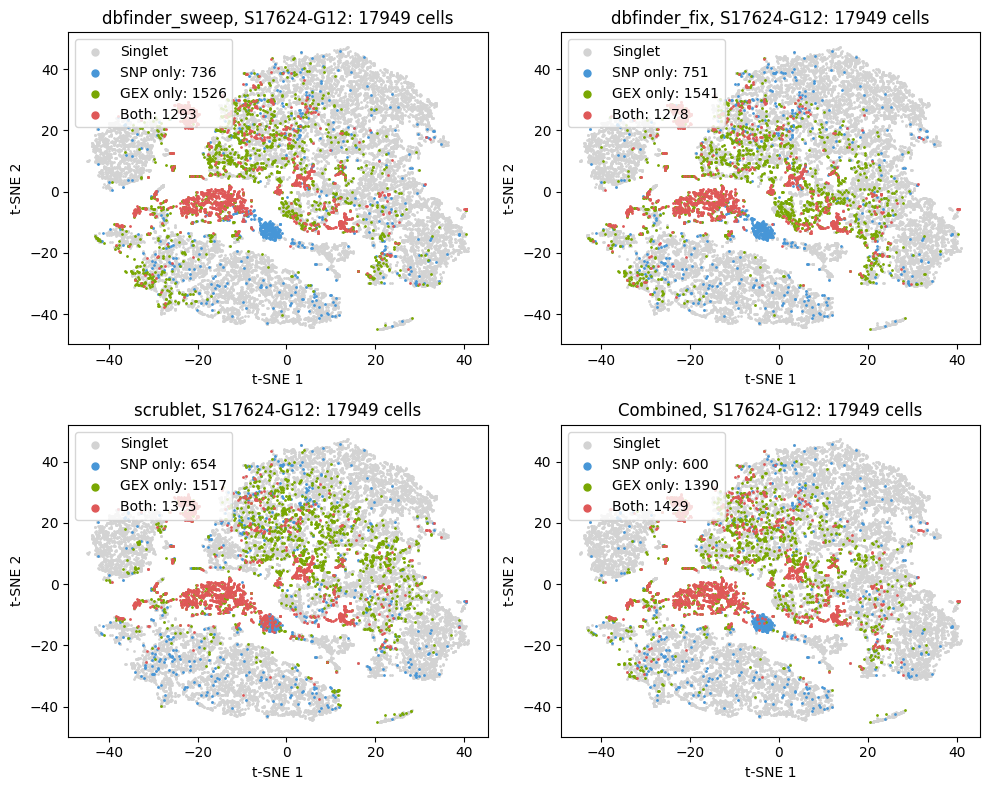

In [148]:
_sample = "S17624-G12"
tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat = load_multi_dat(_sample)
multi_plot(tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat, _sample, 
           fig_file=dat_dir + "doublet/figures/%s.doublet.png" %(_sample))

## More test functions

### Load data

In [89]:
_sample = "S17385-E7"

tsne_dat = pd.read_csv(dat_dir + "/cntCR/%s/outs/analysis/tsne/" %(_sample) + 
                       "2_components/projection.csv")

vireo_dat = pd.read_csv(dat_dir + "/donorID/MS.UMI500.%s/" %(_sample) + 
                        "vireo.GT/donor_ids.tsv", sep = "\t")
vireo_dat['doublet'] = vireo_dat['donor_id'] == 'doublet'
idx = hilearn.match(tsne_dat.Barcode, vireo_dat.cell)
vireo_dat = vireo_dat.loc[idx]
print(np.mean(np.array(tsne_dat['Barcode']) == np.array(vireo_dat['cell'])))

1.0


In [4]:
tsne_dat[:5]

,Barcode,TSNE-1,TSNE-2
0,AAACCTGAGAGGTTGC-1,35.349972,-18.693627
1,AAACCTGAGCAGGTCA-1,5.979633,20.520315
2,AAACCTGAGCGATGAC-1,16.517532,-19.424897
3,AAACCTGAGCTCAACT-1,-41.186841,-2.762367
4,AAACCTGAGGTGTTAA-1,33.116166,18.015784


In [5]:
vireo_dat[:5]

,cell,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet,doublet
0,AAACCTGAGAGGTTGC-1,TUM7,9.990000e-01,6.210000e-04,161,TUM7,"TUM4,TUM3",False
1,AAACCTGAGCAGGTCA-1,doublet,2.480000e-16,1.000000e+00,156,TUM7,"TUM3,TUM4",True
2,AAACCTGAGCGATGAC-1,TUM7,9.940000e-01,6.040000e-03,144,TUM7,"TUM1,TUM7",False
3,AAACCTGAGCTCAACT-1,TUM4,1.000000e+00,6.200000e-05,73,TUM4,"TUM3,TUM6",False
4,AAACCTGAGGTGTTAA-1,TUM3,1.000000e+00,1.420000e-19,353,TUM3,"TUM3,TUM4",False


#### doubletFinder

In [25]:
dbfinder_dat = pd.read_csv(dat_dir + "/doublet/%s.dbfinder.tsv" %(_sample),
                            header=None, sep="\t", names=['cellID', 'score', 'label'])
dbfinder_dat.cellID = [x + "-1" for x in dbfinder_dat.cellID]
dbfinder_dat['doublet'] = dbfinder_dat['label'] == "Doublet"
print(np.mean(dbfinder_dat.cellID == tsne_dat.Barcode))

1.0


In [26]:
print(np.mean(dbfinder_dat.doublet))
dbfinder_dat[:5]

0.15700038999387153


,cellID,score,label,doublet
0,AAACCTGAGAAGCCCA-1,0.1733,Singlet,False
1,AAACCTGAGACTAGGC-1,0.2450,Singlet,False
2,AAACCTGAGAGTGACC-1,0.1559,Singlet,False
3,AAACCTGAGATCGATA-1,0.2347,Singlet,False
4,AAACCTGAGGAGTAGA-1,0.2177,Singlet,False


#### scrublet

In [8]:
scrublet_dat = pd.read_csv(dat_dir + "/doublet/%s.scrublet.tsv" %(_sample), 
                           header=0, sep="\t")
scrublet_dat['doublet'] = scrublet_dat['raw.label']

print(np.mean(scrublet_dat.cellID == tsne_dat.Barcode))

1.0


In [9]:
print(np.mean(scrublet_dat.doublet))
scrublet_dat[:5]

0.06371382513241729


,cellID,raw.score,raw.label,gmm.score,gmm.label,simu.dat1,simu.dat2,doublet
0,AAACCTGAGAGGTTGC-1,0.053,False,0.059,False,0.607,0.378,False
1,AAACCTGAGCAGGTCA-1,0.378,True,0.988,True,0.716,0.279,True
2,AAACCTGAGCGATGAC-1,0.034,False,0.066,False,0.524,0.524,False
3,AAACCTGAGCTCAACT-1,0.093,False,0.056,False,0.716,0.550,False
4,AAACCTGAGGTGTTAA-1,0.077,False,0.055,False,0.577,0.185,False


### Sample 1

In [11]:
_sample = "S17385-E7"
tsne_dat, vireo_dat, dbfinder_dat, scrublet_dat = load_multi_dat(_sample)

NameError: name 'load_multi_dat' is not defined

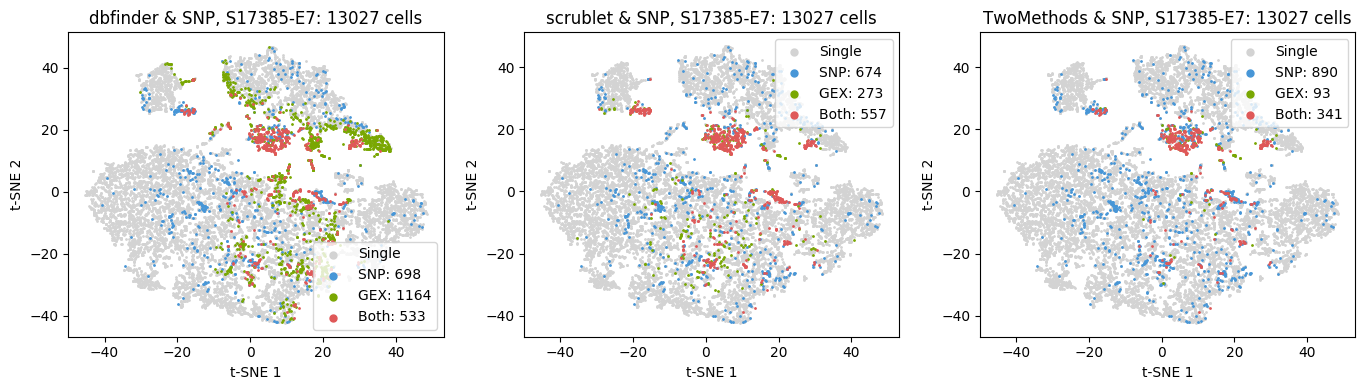

In [40]:
fig = plt.figure(figsize=(14, 4), dpi=100)

### doubletFinder
plt.subplot(1, 3, 1)
scatter_with_label(tsne_dat['TSNE-1'], tsne_dat['TSNE-2'],
                   vireo_dat['doublet'], dbfinder_dat['doublet'],
                   title='dbfinder & SNP, %s' %(_sample))

### scrublet
plt.subplot(1, 3, 2)
scatter_with_label(tsne_dat['TSNE-1'], tsne_dat['TSNE-2'],
                   vireo_dat['doublet'], scrublet_dat['doublet'],
                   title='scrublet & SNP, %s' %(_sample))

### Combine two methods
plt.subplot(1, 3, 3)
scatter_with_label(tsne_dat['TSNE-1'], tsne_dat['TSNE-2'],
                   vireo_dat['doublet'], 
                   scrublet_dat['doublet'] * dbfinder_dat['doublet'],
                   title='TwoMethods & SNP, %s' %(_sample))

plt.tight_layout()
# plt.savefig("../examples/images/compare_stim.png", dpi=300)
plt.show()